In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [3]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,8431.82,8145.28,8455.00,8142.00,11041.87000,2020-01-08 00:00:00,1.035179,0.034574,1.011291,0.01,89
1,8370.92,8431.82,8448.14,8328.89,7355.82000,2020-01-08 01:00:00,0.992777,-0.007249,1.011291,0.01,86
2,8278.59,8370.92,8422.00,8256.74,4048.91000,2020-01-08 02:00:00,0.988970,-0.011091,1.011291,0.01,75
3,8300.34,8278.59,8344.00,8244.93,3947.38000,2020-01-08 03:00:00,1.002627,0.002624,1.011291,0.01,68
4,8344.63,8300.34,8355.87,8288.00,2374.55000,2020-01-08 04:00:00,1.005336,0.005322,1.011291,0.01,68
...,...,...,...,...,...,...,...,...,...,...,...
20151,44685.93,45919.93,46118.85,44500.00,7383.66525,2022-01-05 19:00:00,0.973127,-0.027240,0.999064,0.01,49
20152,43967.01,44685.93,44847.99,43722.54,8054.81116,2022-01-05 20:00:00,0.983912,-0.016219,0.999064,0.01,69
20153,43606.37,43967.01,44331.42,43422.54,3844.19955,2022-01-05 21:00:00,0.991797,-0.008236,0.999064,0.01,71
20154,43437.05,43602.49,43815.20,42500.00,6856.64070,2022-01-05 22:00:00,0.996117,-0.003890,0.999064,0.01,81


In [4]:
df = df[df['NewDateTime']>= '2021-03-01'].copy()
len(df)

7479

In [5]:
df = df.drop_duplicates(subset=['NewDateTime'], keep="last")

In [6]:
data_training = df.iloc[0:int(len(df)-168),:]
data_test = df.iloc[int(len(df)-168):int(len(df)),:]

len(data_training)

7284

In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...
19983,47148.61,47531.47,47549.93,47024.27,1502.366200,0.991945,-0.008087,0.997904,0.0100,57
19984,47369.97,47148.62,47709.20,47079.27,1190.176440,1.004695,0.004684,0.997904,0.0100,61
19985,47230.00,47369.97,47396.66,47053.88,1207.140710,0.997045,-0.002959,0.997904,0.0100,57
19986,47274.61,47230.00,47488.38,47100.00,859.776570,1.000945,0.000944,0.997904,0.0100,51


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape

(7284, 10)

In [11]:
for i in range(336, training_data.shape[0],8):
    
    X_train.append(training_data[i-336:i-168])
    Y_train.append(training_data[i-168:i,0])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
# def shuffle(X,Y):
#     np.random.seed(10)
#     randomList = np.arange(X.shape[0])
#     np.random.shuffle(randomList)
#     return X[randomList], Y[randomList]

In [14]:
# X_train, Y_train = shuffle(X_train,Y_train)

In [15]:
Y_train=Y_train.reshape(Y_train.shape[0],168,1)

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [66]:
import tensorflow as tf
model = tf.keras.models.load_model('168_168_V4.h5')

In [16]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
fromTime = df.at[335,'NewDateTime']
print(str(fromTime))

2022-01-05 23:00:00


In [17]:
df = df.drop(['NewDateTime'], axis = 1)

In [18]:
inputs = scaler.transform(df)
inputs.shape

(336, 10)

In [37]:
df2 =df['close'].copy()
pScaler = MinMaxScaler()
pData = pScaler.fit_transform(df2.values.reshape(-1, 1))
pData.shape

(336, 1)

In [38]:
X_test = []
Y_test = []
P_test = []
for i in range(336, inputs.shape[0]+1,24):
    X_test.append(inputs[i-336:i-168])
    Y_test.append(inputs[i-168:i,0])
    P_test.append(inputs[i-168:i])

In [39]:
X_test, Y_test , P_test= np.array(X_test), np.array(Y_test), np.array(P_test)
X_test.shape, Y_test.shape , P_test.shape

((1, 168, 10), (1, 168), (1, 168, 10))

In [40]:
P_test[0,167,0]

0.36076274219628524

In [41]:
Y_test[0,167]

0.36076274219628524

In [42]:
Y_test=pScaler.inverse_transform(Y_test.reshape(168,1))

In [43]:
Y_pred = model.predict(X_test)
Y_pred=pScaler.inverse_transform(Y_pred.reshape(168,1))


In [44]:
ans = sorted(Y_pred)
print(ans[0]),print(ans[167])

[46397.285]
[48782.184]


(None, None)

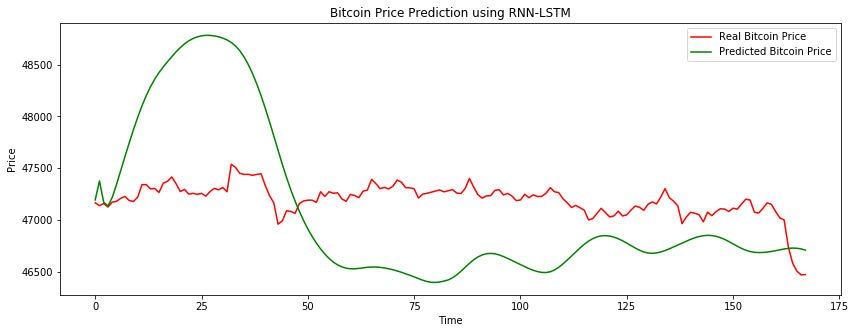

In [45]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[:,0], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
ansPre = model.predict(P_test)
ansPre = pScaler.inverse_transform(ansPre.reshape(168,1))
ans = sorted(ansPre)
print(ans[0]),print(ans[167])

[46635.12]
[48628.54]


(None, None)

In [47]:
ansPre.shape

(168, 1)

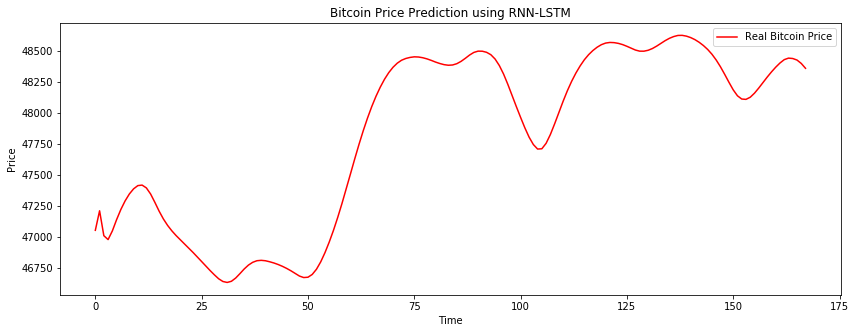

In [48]:
plt.figure(figsize=(14,5))
plt.plot(ansPre[:,0],  color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
print(str(fromTime)),print(ans[0]),print(ans[167])

2022-01-05 23:00:00
[46635.12]
[48628.54]


(None, None, None)